

 Zadanie 1: sprawdź poniżej inne elementy wczytanego zbioru danych, w szczególności opis.
 
 Opisz w max 3 zdaniach swoimi słowami co zawiera zbiór danych
 



In [2]:
# Lab2 - Klasyfikacja z nadzorem
# Przewidywanie klas
 
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 
liczba_sasiadow_opis = 'Liczba sasiadow'
dokladnosci_skoringu_opis = 'Dokladnosc scoringu'
file_name_for_chart = "Lab2_Exercise2_LiczbaSasiadow_Dokladnosc.png"
file_name_for_chart2 = "Lab2_Exercise3_Wina.png"
#


In [5]:
# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

In [15]:
#po przeksztalceniu na pande mozemy generowac nazwy kolumn odpowiednimi komendami
daneOirysach = pd.DataFrame(iris.data, columns=iris.feature_names)

#rodzaj danych zbioru irysa
daneOirysach.info()
#wykaz wartosci zbioru irysa w np. 20 rekordach
daneOirysach.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [17]:
# dane mamy w zbiorze
print('Elementy zbioru: ', list(iris.keys()))

Elementy zbioru:  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [16]:
#opis wedle klucza elementu DESCRIBE
print('Opis irysów zbioru: ', iris['DESCR'])

Opis irysów zbioru:  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ====

In [21]:
#####################################################################

-----------------------------------------------------------------------------------
Opis zawiera:


Zbiór danych o kwiatach to wielowymiarowy zbiór danych wprowadzony przez brytyjskiego statystyka
i biologa Ronalda Fishera w 1936 r. z zastosowaniem wielu pomiarów w problemach taksonomicznych.
Jest on czasem nazywane zestawem danych Iris Andersona, ponieważ Edgar Anderson zebrał dane
w celu kwantyfikacji zmienności morfologicznej kwiatów Iris trzech powiązanych gatunków. 
Zestaw danych składa się z 50 próbek z każdego z trzech gatunków (Iris Setosa, Iris virginica
i Iris versicolor), lacznie ze 150. Z każdej próbki zmierzono cztery cechy: długość i szerokość płatków i płatków, w centymetrach.


Uogólnienie:
 - charakterystyki trzech klas irysów, po 50 instancji każda
 -- wysokosc oraz szerokosc:
 --- dwóch cech
 - odnośniki do bibliografii

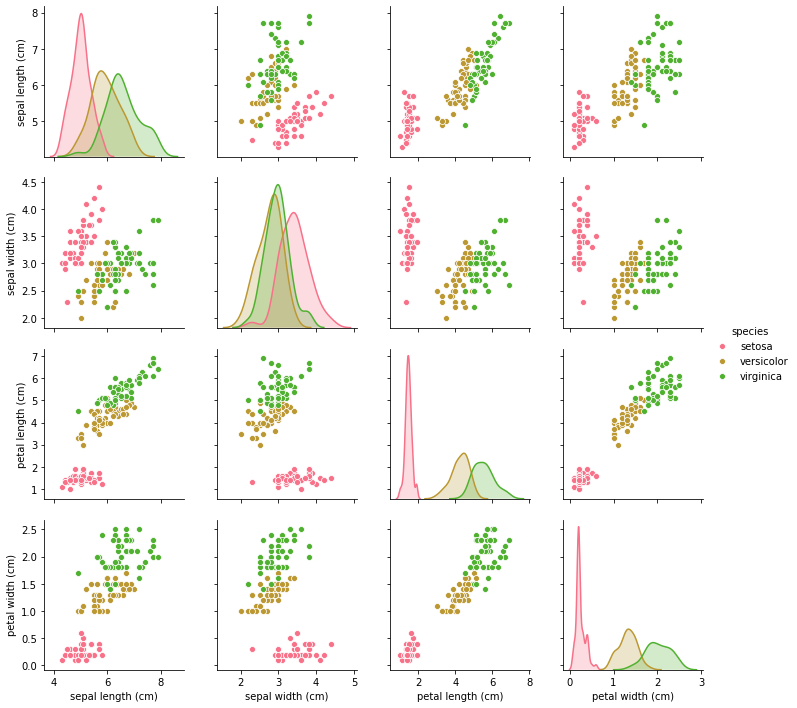

In [20]:
# Zbrazowanie poprzez wykresy zbioru danych
# Elementy zbioru to :  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# wykresy będą tworzone przy pomocy pakietu seaborn
import seaborn as sns

# konwersja na obiekt pandas.DataFrame
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy dla gatunku
targets = map(lambda x: iris['target_names'][x], iris['target'] )

# doklejenie informacji o gatunku do reszty dataframe
iris_df['species'] = np.array(list(targets))


# wykres
sns.pairplot(iris_df, hue='species')
plt.show()



In [26]:
#############################################   ZADANIE 2    ########################

Zadanie 2:
Stwórz listę kilku wybranych przez siebie wartości dla parametru n_neighbors

Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
 
liczby_sasiadow = [1, 2, 3, 4, 5 , 6, 7, 8, 9, 10, 11, 12, 13, 14]
dokladnosci_skoringu = []

In [8]:
for neighbours_count in liczby_sasiadow:
    # W pętli 'for' użyj kolejnych wartości parametru do stworzenia klasyfikatora
    # stworzenie klasyfikatora knn
    knn = KNeighborsClassifier(neighbours_count)
 
    # Następnie naucz go na danych uczących
    knn.fit(X_train, y_train)
 
    # Zapisz wynik scoringu na danych testowych do osobnej listy
    dokladnosci_skoringu.append(knn.score(X_test, y_test))
 
print("Liczba sasiadow, Dokladnosc skoringu")

Liczba sasiadow, Dokladnosc skoringu


In [9]:
for liczba_sasiadow, dokladnosc_skoringu in zip(liczby_sasiadow, dokladnosci_skoringu):
    print([liczba_sasiadow, dokladnosc_skoringu])

[1, 0.9333333333333333]
[2, 0.9333333333333333]
[3, 0.925]
[4, 0.925]
[5, 0.9416666666666667]
[6, 0.925]
[7, 0.9333333333333333]
[8, 0.9083333333333333]
[9, 0.925]
[10, 0.8833333333333333]
[11, 0.9166666666666666]
[12, 0.8416666666666667]
[13, 0.8416666666666667]
[14, 0.85]


In [22]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Text(0, 0.5, 'Dokladnosc scoringu')

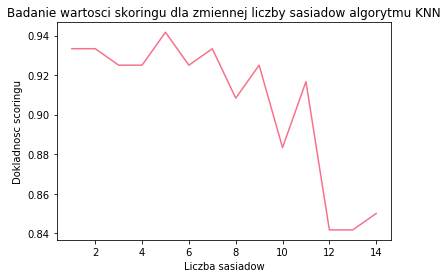

In [23]:
# Wyświetl wykres zależności między liczbą sąsiadów a dokładnością.
# correlation = np.corrcoef(dokladnosci, lista_n)[0][1]
plt.plot(liczby_sasiadow, dokladnosci_skoringu)
plt.title('Badanie wartosci skoringu dla zmiennej liczby sasiadow algorytmu KNN')
plt.xlabel(liczba_sasiadow_opis)
plt.ylabel(dokladnosci_skoringu_opis)
 
# Zapisz do pliku obraz z wykresu
# plt.savefig(file_name_for_chart + '.png')

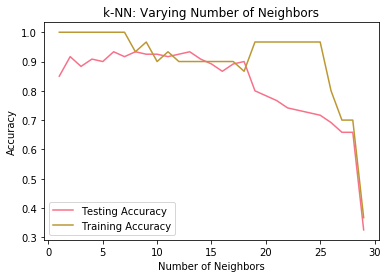

In [25]:
liczba_sasiadow_opis = 'Liczba sasiadow'
dokladnosci_skoringu_opis = 'Dokladnosc scoringu'

file_name_for_chart = "Lab2_Exercise2_LiczbaSasiadow_Dokladnosc.png"
file_name_for_chart2 = "Lab2_Exercise3_Wina.png"
#
# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.8)
 

# Ustawienie tablic dla pzechowywania danych testowych i treningowych
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# pętla dla wartości  k
for i, k in enumerate(neighbors):
    # Skonfiguruj klasyfikator k-NN z k sąsiadów: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # klasyfikator dla danych treningowych
    knn.fit(X_train2, y_train2)
    
    #dokładność na zestawie treningowym
    train_accuracy[i] = knn.score(X_train2, y_train2)

    #dokładność na zestawie testowym
    test_accuracy[i] = knn.score(X_test2, y_test2)

# Wykres
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [27]:
#############################################   ZADANIE 3   ########################

Zadanie 3:
- wczytaj dane o winach za pomocą funkcji poniżej

              from sklearn.datasets import load_wine


- Zbadaj zbiór danych. Stwórz wykresy obrazujące ten zbiór danych.
- Podziel zbiór danych na uczący i testowy.
- Wytrenuj klasyfikator kNN
- Dokonaj predykcji na zbiorze testowym
- Wypisz raport z uczenia: confusion_matrix oraz classification_report

In [28]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
wines = datasets.load_wine()
wines

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [30]:
print('Elementy zbioru win: ', list(wines.keys()))
# Etykiety które występują
print('Cechy win w zbiorze to: ', wines['feature_names'])

Elementy zbioru win:  ['data', 'target', 'target_names', 'DESCR', 'feature_names']
Cechy win w zbiorze to:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [31]:
# konwersja na obiekt pandas.DataFrame
wines_df = pd.DataFrame(wines['data'], columns=wines['feature_names'])
 
# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy dla gatunku
targets = map(lambda x: wines['target_names'][x], wines['target'])
 
# doklejenie informacji o gatunku do reszty dataframe
wines_df['species'] = np.array(list(targets))

In [33]:
#wykaz wartosci zbioru win w np. 10 rekordach
wines_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,species
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,class_0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,class_0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,class_0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,class_0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,class_0


In [34]:
# wykres
# sns.pairplot(wines_df, hue='species')
# plt.savefig(file_name_for_chart2)
 
# Podziel zbiór danych na uczący i testowy.
# Podzielmy zbiór na cechy oraz etykiety
X = wines.data
y = wines.target

In [38]:
# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
 
# Tworzymy klasyfikator k-NN używając parametru 10 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 10)
 
# Wytrenuj klasyfikator kNN
knn.fit(X_train, y_train)
 
# Przewidujemy wartości dla zbioru testowego
# Dokonaj predykcji na zbiorze testowym
y_pred = knn.predict(X_test)

In [39]:
# Sprawdzamy kilka pierwszych wartości przewidzianych
print(["Wartosci przewidziane: ", y_pred[:10]])
 
# Sprawdzamy dokładność klasyfikatora
print(["Dokładność klasyfikatora: ", knn.score(X_test, y_test)])
 
# Wypisz raport z uczenia: confusion_matrix oraz classification_report
print()
print("**** Raport z uczenia - classification_report ****")
print("Precision – What percent of your predictions were correct")
print("Recall – What percent of the positive cases did you catch")
print("The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall"
      "where an F-beta score reaches its best value at 1 and worst score at 0")
print("The support is the number of occurrences of each class in y_true")
print(classification_report(y_test, y_pred))

['Wartosci przewidziane: ', array([0, 0, 0, 2, 0, 1, 1, 2, 1, 0])]
['Dokładność klasyfikatora: ', 0.6573426573426573]

**** Raport z uczenia - classification_report ****
Precision – What percent of your predictions were correct
Recall – What percent of the positive cases did you catch
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recallwhere an F-beta score reaches its best value at 1 and worst score at 0
The support is the number of occurrences of each class in y_true
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        49
           1       0.59      0.66      0.62        56
           2       0.41      0.29      0.34        38

    accuracy                           0.66       143
   macro avg       0.62      0.63      0.62       143
weighted avg       0.64      0.66      0.64       143



In [41]:
print()
print("**** Raport z uczenia - confusion_matrix ****")
print("x - Aktualna class")
print("y - Przewidziana class")
print('Klasy win w zbiorze to: ', wines['target_names'])
print(confusion_matrix(y_test, y_pred))
 
# Jak bardzo wyniki różnią się od prawdziwych wartości?
print("Raporty pokrywają się nbajbardziej z rzeczywistością dla class_0")
print("Raporty w małym stopniu pokrywają się z rzeczywistością dla class_1, class_2")


**** Raport z uczenia - confusion_matrix ****
x - Aktualna class
y - Przewidziana class
Klasy win w zbiorze to:  ['class_0' 'class_1' 'class_2']
[[46  3  0]
 [ 3 37 16]
 [ 4 23 11]]
Raporty pokrywają się nbajbardziej z rzeczywistością dla class_0
Raporty w małym stopniu pokrywają się z rzeczywistością dla class_1, class_2
